<span style="font-size:30px">**Medidas de Grupos de los nodos. Parte 2: Modularidad.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Introducción:

### Los fundamentos del uso de la modularidad como una medida de la cantidad de enlaces entre nodos de la misma comunidad, parte de la necesidad de detectar comunidades significativas en redes.

### La modularidad implica una descripción en términos de propiedades extrínsecas de la red, es decir, propiedades que no están relacionadas con los enlaces entre nodos. Hasta ahora hemos hablado de propiedades asociadas a la topología de la red, como la matriz de adyacencia, el grado de un nodo y el número de enlaces, términos que usamos en la parte 1 sobre el coeficiente de acumulación. Para la modularidad, la cuál responde a la pregunta sobre cómo se distribuyen los enlaces de forma preferente entre nodos de la misma clase, introduciremos dos propiedades: La clase del nodo ($c_i$) y el número de clases en la red ($n_c$).

### Definimos analíticamente a la modularidad mediante la siguiente cantidad:

<font size="5"> $Q=\frac{1}{2L}[\sum _{i ,j} (A_{ij}-\frac{k_i k_j}{2L}) \delta (c_i,c_j)]$ </font>

### En donde:

### $\circ A$ es la matriz de adyacencia.

### $\circ k_i$ es el grado del nodo $i$.

### $\circ L$ es el número de sus enlaces.

### $\circ \delta (c_i,c_j):=\begin{cases}
1 & \text{si } c_i = c_j \\
0 & \text{si } c_i \neq c_j
\end{cases} $

## Hagamos un pequeño análisis de los términos de $Q$.

### 1) Fijémonos en el término $\sum _{i ,j} \frac{k_i k_j}{2L} \delta (c_i,c_j):=\triangle$:

### La probabilidad de que los nodos $i$ y $j$ estén conectados dada una distribución aleatoria de enlaces entre nodos en una red, con los grados y el número de enlaces fijos, se describe mediante la relación:

<font size="5"> $P \propto k_i k_j$ </font>

### Que normalizando con respecto a los $2L$ extremos distribuidos aleatoriamente (pues hablamos de redes no dirigidas de $L$ enlaces) tenemos que:

<font size="5"> $P \propto \frac{k_i k_j}{2L}$ </font>

### Por lo que $ P \propto  \frac{k_i k_j}{2L} \delta (c_i,c_j)$ es la probabilidad de que $i$ y $j$ estén conectados en una distribución aleatoria y sean de la misma clase o comunidad.

### De lo anterior tenemos que $\sum _{i ,j} \frac{k_i k_j}{2L} \delta (c_i,c_j)$ es el valor esperado del número de enlaces entre nodos de la misma clase dada una distribución aleatoria de enlaces.

### 2) Fijémonos en el término $\sum _{i ,j} A_{ij} \delta (c_i,c_j):=\square$:

### Con base en el análisis en el primer punto concluimos que $\sum _{i ,j} A_{ij} \delta (c_i,c_j)$ es el número de enlaces entre nodos de la misma clase que realmente se tienen.

### Tomando los puntos 1) y 2) podemos decir que $Q$ es la diferencia (o una comparación) entre el número de enlaces entre nodos de la misma clase y su valor esperado si los enlaces se distribuyen aleatoriamente.

### Podemos describir los valores de $Q$ dadas las siguientes condiciones:

<font size="5"> $Q \rightarrow \begin{cases}
>0 & \text{, } \square > \triangle \\
<0 & \text{, } \square < \triangle \\
\approx 0 & \text{, } \square \approx \triangle
\end{cases}$ </font>

### De todo lo anterior, decimos que una comunidad de nodos (o una clase) es significativa si $Q>0.3$ (este argumento se toma de la convención definida por M. E. J. Newman et al. en el artículo: Newman, M. E. J., Clauset, A., Moore, C. (2004). Finding community structure in very large networks. arXiv:cond-mat/0408187. https://arxiv.org/pdf/cond-mat/0408187).

### Es decir, si $Q>0.3$ los enlaces se concentran más en nodos de la misma clase que si se distrubuyeran de forma aleatoria.

### La modularidad se emplea comunmente para ver si existen comunidades significativas, esto es que de entre tantas particiones posibles de la red, cuáles darán los valores más grandes de $Q$. Para ello se emplean algoritmos o métodos que maximicen la modularidad. Por ejemplo, el método de Newman et al. descrito anteriormente o el algoritmo de Vincent D. Blondel et al (Blondel, V. D., Guillaume, J. L., Lambiotte, R., & Lefebvre, E. (2008). Fast unfolding of communities in large networks. arXiv:0803.0476. https://arxiv.org/pdf/0803.0476).

# Ejercicio:

### Continuaremos trabajando con la estructura vista en la primera parte.

### Para implementar una detección de comunidades en la red en términos de la modularidad, usaremos la función *greedy_modularity_communities*, la cual también nos arroja un diccionario que imprime un conjunto de nodos separados por comunidades.

### En este caso tenemos dos índices asociados, uno que caracteriza los elementos que conforman las comunidades y otro que caracteriza a las comunidades.

### Trabajaremos sobre la misma red usada en la primera parte, *ca-netscience.mtx*.


,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


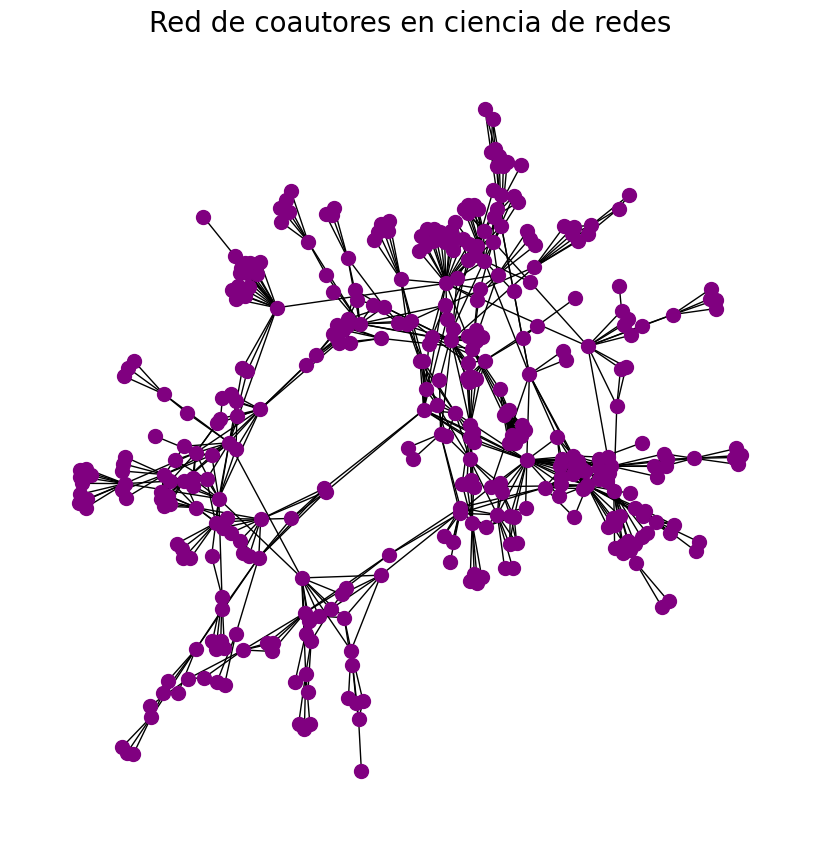

[frozenset({21,
            22,
            23,
            24,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            41,
            42,
            43,
            50,
            51,
            52,
            53,
            54,
            55,
            76,
            109,
            167,
            168,
            169,
            170,
            205,
            216,
            217,
            218,
            219,
            220,
            221,
            227,
            228,
            232,
            233,
            241,
            242,
            243,
            244,
            266,
            267,
            268,
            275,
            276,
            277,
            287,
            288,
            289,
            290,
            291,
            292,
            307,
            336,
            364,
            369,
            370}),
 frozenset({25,
            26,
 

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms.community import greedy_modularity_communities # para detección de comunidades

#Leemos y mostramos la red con un formato adecuado:
datos=pd.read_csv('ca-netscience.mtx',skiprows = 2, header = None,sep = ' ' )
display(datos)

#Generar una red de NetworkX a partir del data frame Pandas:
G=nx.from_pandas_edgelist(datos,source = 0,target = 1) #Formato: (Nodo origen ,  Nodo destino)
plt.figure( figsize = [8,8] )
nx.draw(G,node_size = 100, node_color = 'purple') 
plt.title("Red de coautores en ciencia de redes",fontsize=20)
plt.show()

#Comunidades con el método de Newman:
comunidades=greedy_modularity_communities(G)
display(comunidades)

{266: 0,
 267: 0,
 268: 0,
 275: 0,
 276: 0,
 277: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 30: 0,
 287: 0,
 288: 0,
 31: 0,
 32: 0,
 33: 0,
 289: 0,
 35: 0,
 34: 0,
 36: 0,
 290: 0,
 41: 0,
 292: 0,
 291: 0,
 43: 0,
 167: 0,
 168: 0,
 169: 0,
 42: 0,
 170: 0,
 50: 0,
 307: 0,
 51: 0,
 52: 0,
 53: 0,
 55: 0,
 54: 0,
 76: 0,
 205: 0,
 336: 0,
 216: 0,
 217: 0,
 218: 0,
 219: 0,
 220: 0,
 221: 0,
 227: 0,
 228: 0,
 232: 0,
 233: 0,
 364: 0,
 109: 0,
 241: 0,
 242: 0,
 243: 0,
 244: 0,
 369: 0,
 370: 0,
 256: 1,
 257: 1,
 273: 1,
 25: 1,
 282: 1,
 26: 1,
 283: 1,
 284: 1,
 155: 1,
 156: 1,
 157: 1,
 158: 1,
 27: 1,
 28: 1,
 39: 1,
 295: 1,
 40: 1,
 296: 1,
 297: 1,
 173: 1,
 174: 1,
 175: 1,
 306: 1,
 315: 1,
 316: 1,
 317: 1,
 197: 1,
 198: 1,
 326: 1,
 231: 1,
 104: 1,
 105: 1,
 234: 1,
 235: 1,
 106: 1,
 236: 1,
 237: 1,
 238: 1,
 239: 1,
 240: 1,
 107: 1,
 108: 1,
 372: 1,
 246: 1,
 247: 1,
 251: 1,
 124: 1,
 125: 1,
 255: 1,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 285: 2,
 303: 2,
 67: 2,
 68: 2,

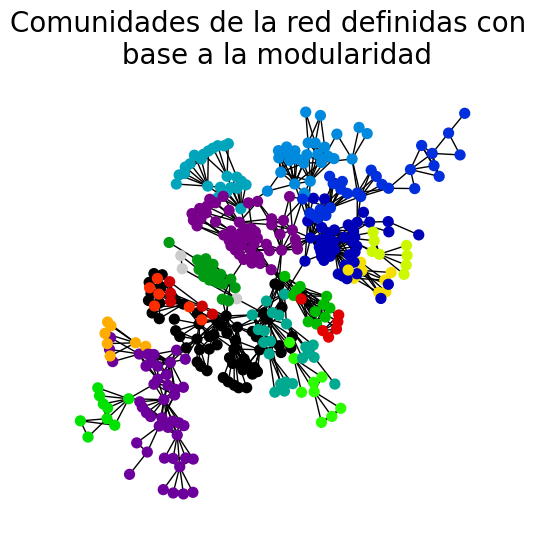

In [10]:
#Ordenando comunidades y nodos:
diccionario={}
for i, comunidad in enumerate(comunidades): #recorremos los índices que caracterizan a las comunidades
  for nodo in comunidad: #recorremos los índices que caracterizan a los nodos
    diccionario[nodo] = i 
    
display(diccionario)
colores_de_comunidades=np.array([diccionario[i] for i in G])
plt.figure(figsize = [6,6])
plt.title("Comunidades de la red definidas con \n base a la modularidad",fontsize=20)
nx.draw_kamada_kawai(G,node_color=colores_de_comunidades,node_size = 50,cmap='nipy_spectral')
plt.show()

In [12]:
#Maximización de la modularidad: Comprobación del criterio Q>0.3:
Q=nx.algorithms.community.modularity(G, comunidades)
print(f"El criterio Q>0.3 se cumple, pues tenemos que Q={Q}")

El criterio Q>0.3 se cumple, pues tenemos que Q=0.8386393997577197


# Fin del ejercicio.